# Exploring Customer Behavior: A Data-Driven Analysis of Demographics, Services, and Payment Patterns and More

##### 

### Exploratory Data Analysis (EDA)

In [174]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter

In [170]:
# Load Data
Cust_data_db = pd.read_csv("/Users/taimalee/Telcommunication Customer Churn.csv")

# Displaying the subset
Cust_data_db.iloc[:5, :10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [22]:
# Get an overview of the data types and missing values
print(Cust_data_db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
# Get basic statistics about the dataset
print(Cust_data_db.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


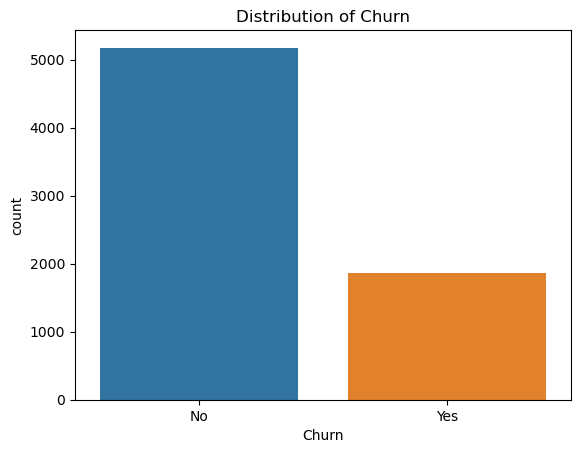

In [28]:
# Plot the distribution of churn
sns.countplot(x='Churn', data=Cust_data_db)
plt.title('Distribution of Churn')
plt.show()

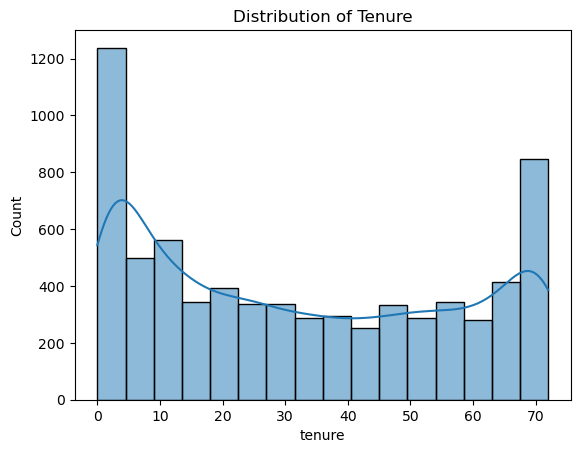

In [29]:
# Plot the distribution of tenure
sns.histplot(Cust_data_db['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [171]:
# Step 2: Convert it to a DataFrame
Cust_data_df = pd.DataFrame(Cust_data_db)

#### 

### Analysis

##### What is the average monthly charge across different customer demographics ?
Analyze how monthly charges differ based on factors like age, gender, or relationship status.

In [172]:
# Calculate Average Monthly Charges

# Average monthly charges by senior citizen status
avg_charge_senior = Cust_data_df.groupby('SeniorCitizen')['MonthlyCharges'].mean()

# Average monthly charges by gender
avg_charge_gender = Cust_data_df.groupby('gender')['MonthlyCharges'].mean().reset_index()

# Average monthly charges by partner status
avg_charge_partner = Cust_data_df.groupby('Partner')['MonthlyCharges'].mean().reset_index()


##### Plot the Data

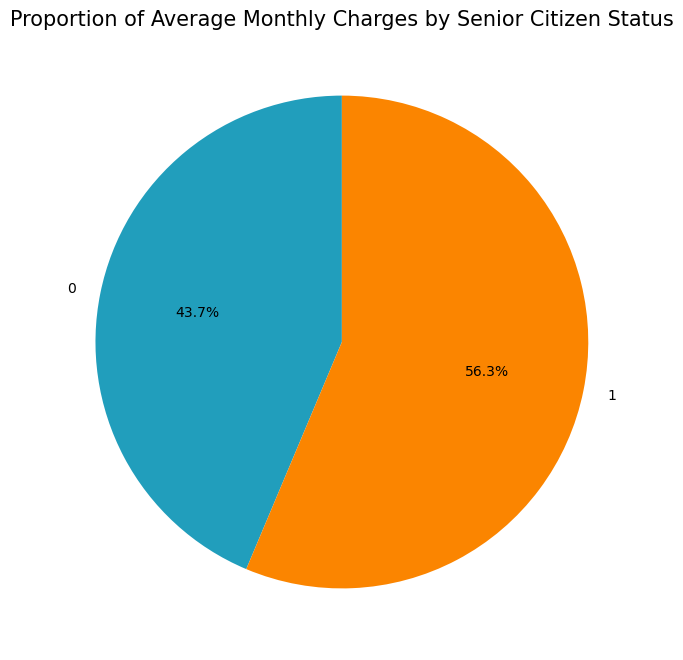

In [79]:
# Set the color palette
colors = ['#219EBC', '#FB8500']
sns.set_palette(colors)

# Plot average monthly charges by senior citizen status
plt.figure(figsize=(8, 8))
plt.pie(avg_charge_senior, labels=avg_charge_senior.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Average Monthly Charges by Senior Citizen Status', fontsize=15)
plt.show()


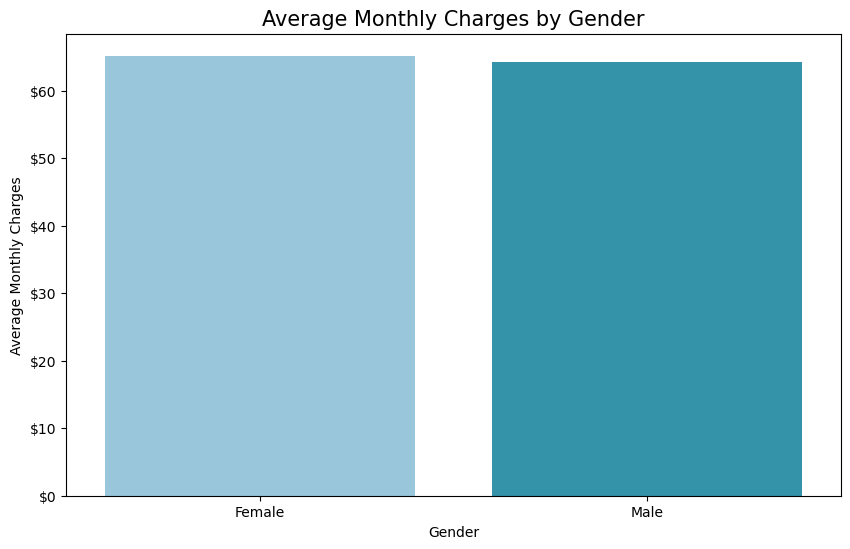

In [175]:
# Set the color palette
colors = ['#8ECAE6', '#219EBC']
sns.set_palette(colors)

# Function to format y-axis labels as currency
def currency_format(x, _):
    return f'${x:,.0f}'

# Plot average monthly charges by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='MonthlyCharges', data=avg_charge_gender)
plt.title('Average Monthly Charges by Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Average Monthly Charges')

# Apply the currency format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

plt.show()

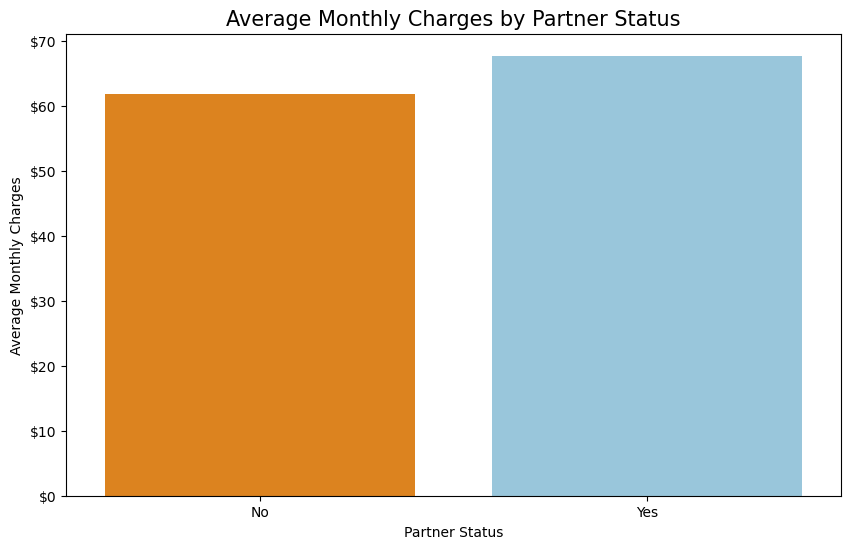

In [176]:
# Set the color palette
colors = ['#FB8500', '#8ECAE6']
sns.set_palette(colors)

# Function to format y-axis labels as currency
def currency_format(x, _):
    return f'${x:,.0f}'

# Plot average monthly charges by partner status
plt.figure(figsize=(10, 6))
sns.barplot(x='Partner', y='MonthlyCharges', data=avg_charge_partner)
plt.title('Average Monthly Charges by Partner Status', fontsize=15)
plt.xlabel('Partner Status')
plt.ylabel('Average Monthly Charges')

# Apply the currency format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

plt.show()

#### 

#### Is there a correlation between payment method and churn?
Investigate whether customers using certain payment methods (e.g., electronic check, mailed check) are more likely to churn.

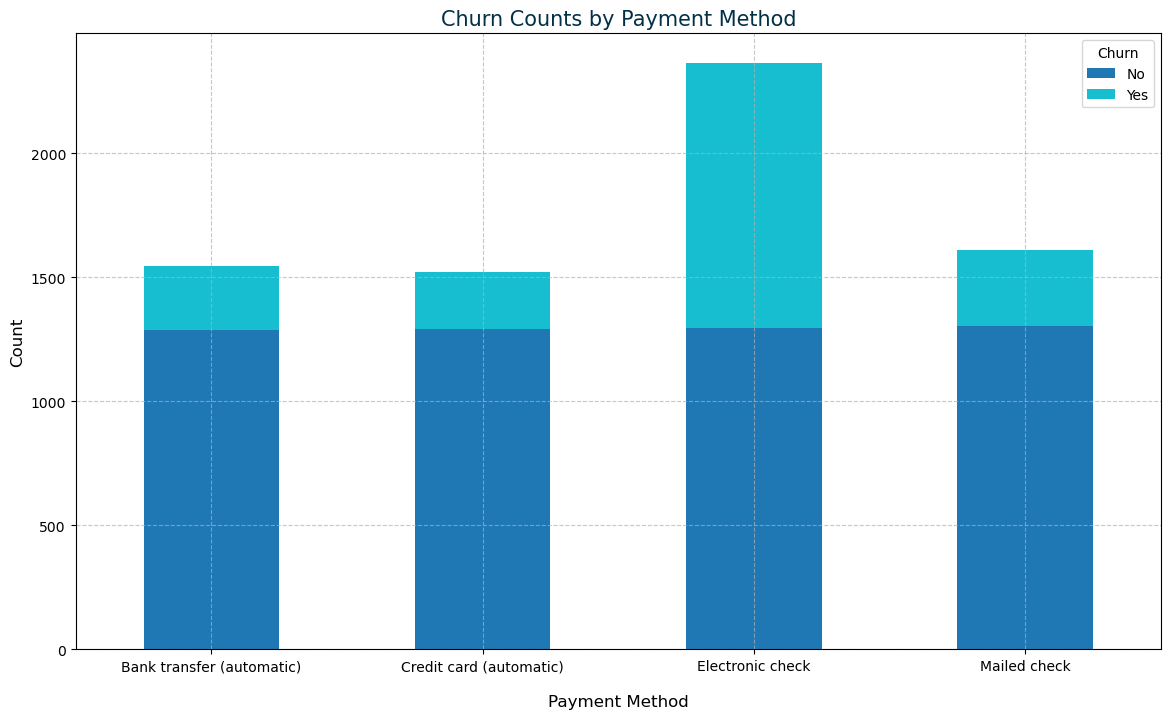

In [131]:
#count of churned vs. non-churned customers for each payment method.

# Create a DataFrame with counts of churned and non-churned
churn_counts_by_payment = Cust_data_df.groupby(['PaymentMethod', 'Churn']).size().unstack().fillna(0)
churn_counts_by_payment.columns = ['No', 'Yes']

# Plot a stacked bar chart
churn_counts_by_payment.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Churn Counts by Payment Method', fontsize=15, color='#023047')
plt.xlabel('Payment Method', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Churn')

# Set x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()


##### 

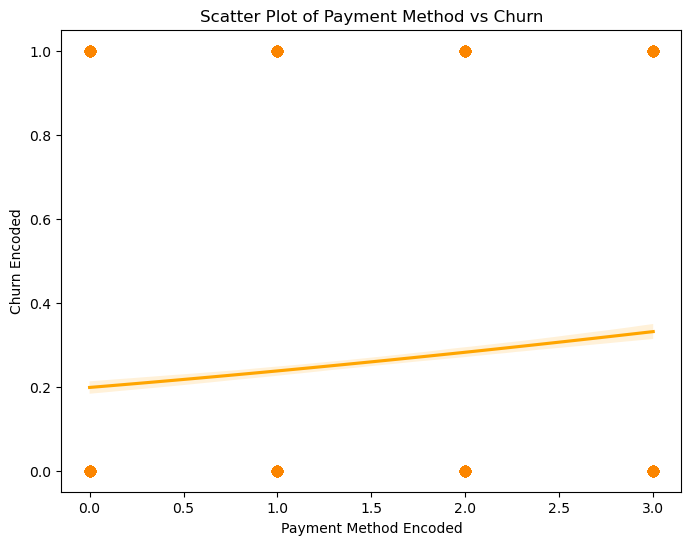

In [143]:
# Correlation between PaymentMethod and Churn,

# Encode the payment methods
payment_method_encoder = LabelEncoder()
Cust_data_df['PaymentMethodEncoded'] = payment_method_encoder.fit_transform(Cust_data_df['PaymentMethod'])

# Encode the churn column
churn_encoder = LabelEncoder()
Cust_data_df['ChurnEncoded'] = churn_encoder.fit_transform(Cust_data_df['Churn'])

# Create the scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='PaymentMethodEncoded', y='ChurnEncoded', data=Cust_data_df, logistic=True, scatter_kws={'s':50}, line_kws={'color':'Orange'})
plt.title('Scatter Plot of Payment Method vs Churn')
plt.xlabel('Payment Method Encoded')
plt.ylabel('Churn Encoded')
plt.show()

In [139]:
# Quantify the relationship between payment method and churn

# Calculate the correlation between payment method and churn
correlation = Cust_data_df[['PaymentMethodEncoded', 'ChurnEncoded']].corr().iloc[0, 1]
print(f'Correlation between Payment Method and Churn: {correlation:.2f}')

Correlation between Payment Method and Churn: 0.11


#### 


#### How does the presence of dependents affect customer tenure?
Investigate if customers with dependents are more likely to longer or shorter tenure.


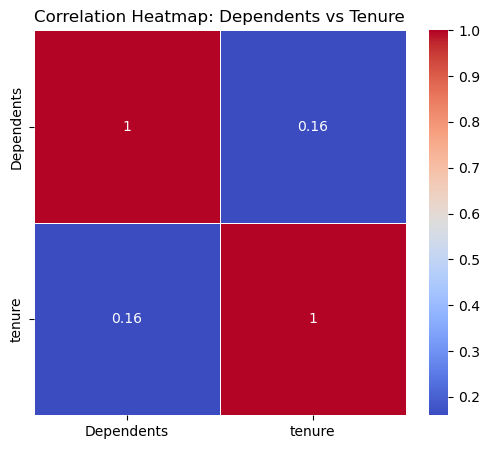

In [162]:
# Encode 'Dependents' as numerical values (Yes = 1, No = 0)
Cust_data_df['Dependents'] = Cust_data_df['Dependents'].map({'Yes': 1, 'No': 0})

# Create a correlation matrix for Dependents and Tenure
corr_matrix = Cust_data_df[['Dependents', 'tenure']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap: Dependents vs Tenure')
plt.show()

#### 